<p style="text-align:justify;font-family:fantasy;font-size:25px">
Step 1: Importing the Packages
</p>

In [2]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


plt.rcParams['figure.figsize'] = 12,4

<p style="text-align:justify;font-family:fantasy;font-size:25px">
Step 2: Loading the Dataset
</p>

In [4]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# Renaming the Columns

data.columns = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death']

In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death                       0
dtype: int64

<p style="text-align:justify;font-family:fantasy;font-size:25px">
Step 3: Selecting the important Features
</p>

In [7]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

<AxesSubplot:>

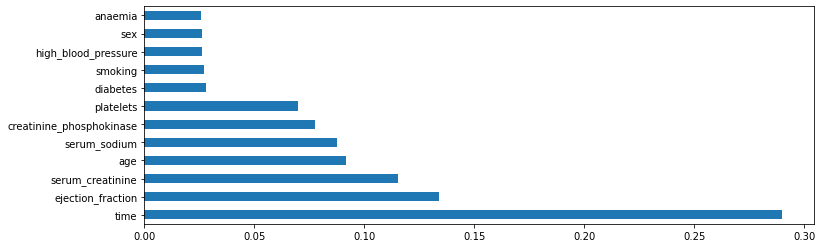

In [8]:
feat_imp = pd.Series(model.feature_importances_, index= x.columns)
feat_imp.nlargest(12).plot(kind = 'barh')

<p style="text-align:justify;font-family:fantasy;font-size:25px">
Step 4: Outlier Detection and Removal
</p>

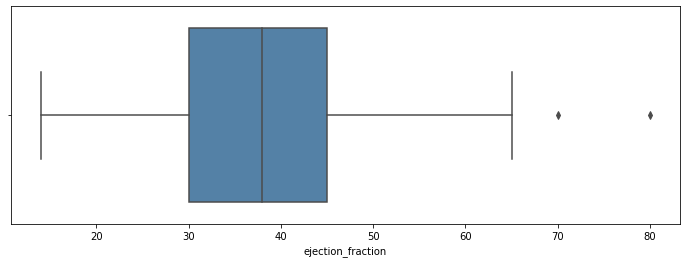

In [9]:
# Ejection Fraction

sns.boxplot(x = data.ejection_fraction, color='steelblue')
plt.show()

<p style="text-align:justify;font-family:fantasy;font-size:17px">
We can see the two outliers; and we will remove the same.
</p>

In [10]:
data = data[data.ejection_fraction < 70].reset_index()

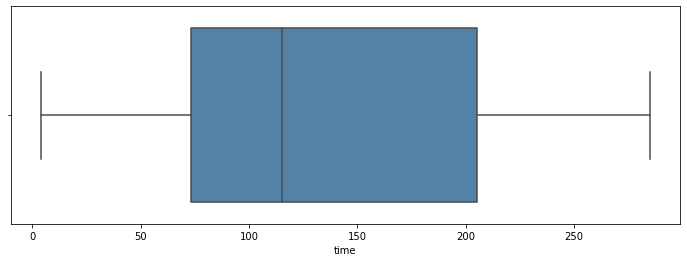

In [11]:
# Outliers in Time

sns.boxplot(x = data.time, color = 'steelblue')
plt.show()

<p style="text-align:justify;font-family:fantasy;font-size:17px">
No Outliers spotted.
</p>

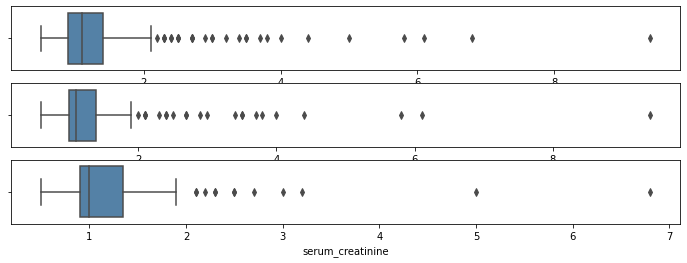

In [12]:
# Outliers in Serum Creatinine

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
sns.boxplot(x = data.serum_creatinine, color='steelblue',ax=ax) #general
ax = fig.add_subplot(3,1,2)
sns.boxplot(x = data.serum_creatinine[data.sex == 1], color='steelblue', ax = ax) #male
ax = fig.add_subplot(3,1,3)
sns.boxplot(x = data.serum_creatinine[data.sex == 0], color='steelblue', ax = ax) # female

plt.show()

<p style="text-align:justify;font-family:fantasy;font-size:25px">
Step 5: Preparing & Training the Model
</p>

In [13]:
X = data.iloc[:,[5,8,12]].values 
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
# Defining the models to be fed in Voting Classifier

logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=6)
svc = SVC(C = 0.6, random_state=0, kernel='rbf')
dectree = DecisionTreeClassifier(max_leaf_nodes= 3, random_state=0, criterion='entropy')
rnd = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=0)

In [16]:
vot_clf = VotingClassifier(
    estimators= [
        ('lr', logreg),
        ('knn',knn),
        ('svc',svc),
        ('tree',dectree),
        ('rnd',rnd)],
    voting = 'hard'
)

vot_clf.fit(X_train,y_train)
y_pred = vot_clf.predict(X_test)

In [17]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred) * 100} %')

Accuracy Score: 95.0 %


<AxesSubplot:>

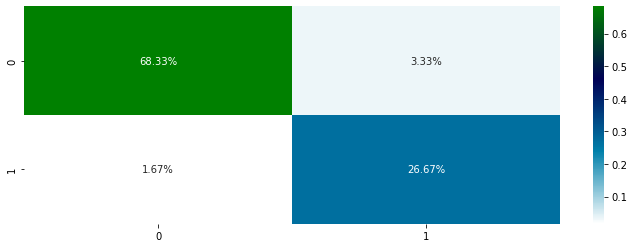

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt = '.2%', cmap = 'ocean_r')